In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from textblob import TextBlob
import tweepy
from newspaper import Article
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kenny1208/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/kenny1208/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
sia = SentimentIntensityAnalyzer()

sentence = "Apple's new product has received rave reviews from critics. Everyone loves the new apple product! Great job, Apple!"
scores = sia.polarity_scores(sentence)
print(scores)

{'neg': 0.086, 'neu': 0.586, 'pos': 0.328, 'compound': 0.8011}


In [6]:
url = 'https://www.cnbc.com/2024/10/04/apple-is-turning-to-its-army-of-developers-for-an-edge-in-the-ai-race.html?&qsearchterm=apple'
article = Article(url)

article.download()
article.parse()
text = article.text
print(text)

A view of Apple's new iPhone 16 at an Apple Store on the Regent Street in London, United Kingdom on September 20, 2024.

As Apple prepares Apple Intelligence to jump into Silicon Valley's AI race, it's relying on one of its strongest advantages: Its army of 34 million app developers.

IPhone users will get their first taste of Apple Intelligence, the company's artificial intelligence system, later this month. The company is relying on Apple Intelligence to be the strongest selling point for the iPhone 16, its latest generation of smartphones.

Apple's AI isn't as advanced as the state of the art coming out of the most advanced labs, such as rivals like OpenAI's ChatGPT, Google's Gemini and Meta's Llama. Apple isn't using the biggest models, nor can it pull off some of the more show-stopping tricks of the bleeding-edge voice models — OpenAI's latest can sing, for example.

Where Apple is hoping to distinguish its AI is that Siri may actually be able to do things on your phone — send ema

In [7]:
scores = sia.polarity_scores(text)
print(scores)

{'neg': 0.018, 'neu': 0.843, 'pos': 0.139, 'compound': 0.9965}


In [8]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
iPhone ORG
16 CARDINAL
the Regent Street ORG
London GPE
United Kingdom GPE
September 20, 2024 DATE
Apple ORG
Apple Intelligence ORG
Silicon Valley's LOC
AI GPE
one CARDINAL
34 million CARDINAL
first ORDINAL
Apple Intelligence ORG
later this month DATE
Apple Intelligence ORG
Apple ORG
OpenAI ORG
Google ORG
Gemini ORG
Meta ORG
Llama PRODUCT
Apple ORG
OpenAI ORG
Apple ORG
AI GPE
Siri GPE
AI ORG
Apple ORG
third ORDINAL
Apple Intelligence ORG
Siri, ORG
Apple ORG
June DATE
hundreds CARDINAL
Apple ORG
Kelsey Peterson PERSON
Apple Intelligence ORG
Apple ORG
Apple Intelligence ORG
millions CARDINAL
non-Apple NORP
as many as hundreds CARDINAL
App Intents PRODUCT
Apple ORG
annual DATE
App Store PERSON
millions CARDINAL
third ORDINAL
one CARDINAL
Apple ORG
AI GPE
Jordan Morgan PERSON
App Intents PERSON
Apple ORG
millions CARDINAL
Apple Intelligence ORG
last year's DATE
15 CARDINAL
16 CARDINAL
this year DATE
Apple ORG
Siri GPE
Siri GPE


In [9]:
client = tweepy.Client(
    bearer_token='AAAAAAAAAAAAAAAAAAAAAAxp0AEAAAAAOlMfaMmWluJHkqtWaI4tK%2Ff1O2I%3DyTGa8U9dgcCAY3TILucgNGRpQQ6Oala7xsWBPEGBt1fue6Hxyk',
    consumer_key='TZAGJHDHylimNuPSEEDr38ddA',
    consumer_secret='ZwBAt2IieckHCDjCsYBQ14Lnaaf3ZnHeTPNaGZAHOk2KWlBoNc',
    access_token='883451758659239937-WsgdffhRF79JMRa2c5yhZ5k54vPmnKC',
    access_token_secret='rsQMoSphf84sErGInLehvxUeQNR5hOEKmlt0mXu1dmC4Z'
)


In [10]:
response = client.search_recent_tweets(query="Apple", max_results=100)
for tweet in response.data:
    print(tweet.text)

RT @charliekirk11: The Trump Effect on Investment Pledges in the US:

Hyundai — $20 Billion
UAE — $1.4 Trillion
Saudi Arabia — $600 Billion…
RT @soup3211: Black sapphire vrs candy apple animation #CRK #cookierunkingdom #blacksapphirecookie #candyapplecookie https://t.co/Zz34iOurV8
RT @icesmith_: Please stream his music on YouTube, Spotify, Apple Music, or other Korean music platforms, and keep purchasing his songs on…
RT @RunBTSArg: 🍎 Apple Music Argentina  🇦🇷 
  Top Álbumes (24/05) 

#8• #TheMostBeautifulMomentInLife_pt2 
#12• #LoveYourself_her 
#21• #MU…
Inbox me with your cashapp or PayPal or Apple Pay if you need help with bills or house rent or college ❤️❤️❤️ https://t.co/weFmNLJlRX
RT @selenachartsbr: 🇬🇧 iTunes UK: 

36. “How Does It Feel To Be Forgotten” (+20) *new peak*

 https://t.co/DxEU1CXxNZ
RT @libsoftiktok: Since Trump took office, a staggering $2.924 trillion in investment has flowed into the United States:

- UAE $1.4 trilli…
RT @charliekirk11: The Trump Effect on Inves

In [11]:
tweet_texts = [tweet.text for tweet in response.data]
scores = [sia.polarity_scores(text)['compound'] for text in tweet_texts]

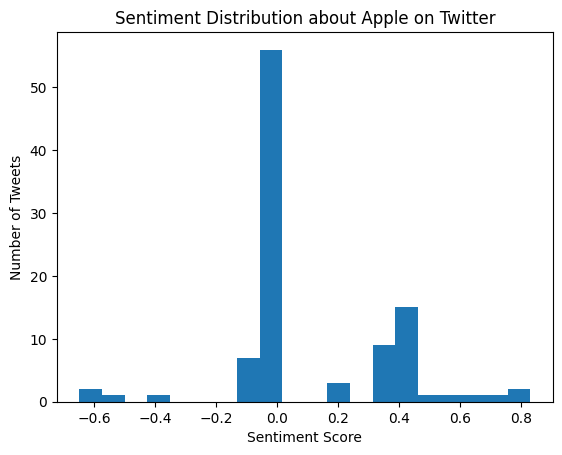

In [12]:
plt.hist(scores, bins=20)
plt.title('Sentiment Distribution about Apple on Twitter')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()